### Imporet packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


/Users/user/miniforge3/envs/10A/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Read the clean data extracted using Data-Cleaning-Transformation-Extraction.ipynb

In [2]:
clean_data = pd.read_csv('../data/clean_data.csv')
print(clean_data.shape)
clean_data.head()

(148935, 45)


/var/folders/6b/0t1qb1d92f72c46kvp35pwfc0000gn/T/ipykernel_17803/3384474639.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_data = pd.read_csv('../data/clean_data.csv')


Bearer Id                Start  Start ms                  End  \
0  13114483460844900352  2019-04-04 12:01:18     770.0  2019-04-25 14:35:31   
1  13114483482878900224  2019-04-09 13:04:04     235.0  2019-04-25 08:15:48   
2  13114483484080500736  2019-04-09 17:42:11       1.0  2019-04-25 11:58:13   
3  13114483485442799616  2019-04-10 00:31:25     486.0  2019-04-25 07:36:35   
4  13114483499480700928  2019-04-12 20:10:23     565.0  2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0           2501332.0   
1            L77566A  ...          20247395.0          19111729.0   
2            D42335A  ...          19725661.0          14699576.0   
3            T21824A  ...          21388122.0          15146643.0   
4            D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 45 columns]

In [3]:
#get name of columns
clean_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',


## Task1.0

### Top 10 handsets used by the customers

1394 users
Number of posts per user


<AxesSubplot:>

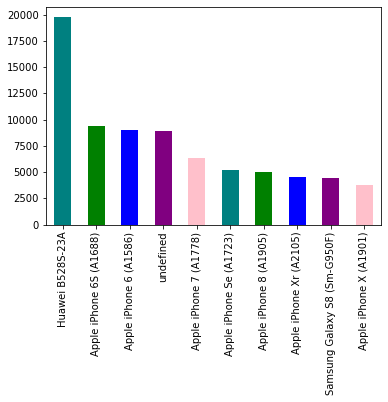

In [4]:
handset_count = clean_data['Handset Type'].value_counts()
print(len(handset_count), "users")
print("Number of posts per user")
handset_count[:10].plot(kind='bar', color=['teal', 'green', 'blue','purple','pink'])


### Top 3 handset manufacturers

170 users
Number of posts per user


<AxesSubplot:>

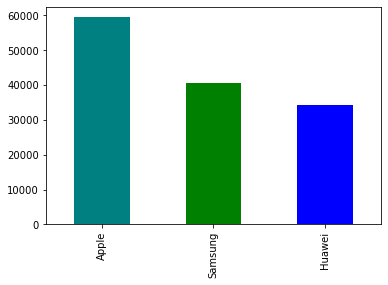

In [5]:
handset_manufacturer = clean_data['Handset Manufacturer'].value_counts()
print(len(handset_manufacturer), "users")
print("Number of posts per user")
handset_manufacturer[:3].plot(
    kind='bar', color=['teal', 'green', 'blue'])


### Top 5 handsets per top 3 manufacturers

In [6]:
handset_man= clean_data[clean_data['Handset Manufacturer'].isin(['Apple','Samsung','Huawei'])]
handset = handset_man.groupby('Handset Manufacturer')['Handset Type'].value_counts()
apple = handset.Apple[:5]
sumsung = handset.Samsung[:5]
huawei = handset.Huawei[:5]


In [7]:
apple.keys()

Index(['Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)'],
      dtype='object', name='Handset Type')

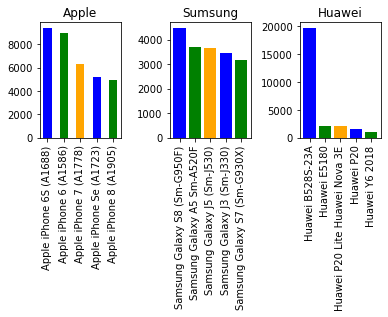

In [25]:
fig, ax = plt.subplots(1, 3)

ax[0].bar(apple.keys(), apple.values, tick_label=apple.keys(),
          width=.5, color=['blue', 'green', 'orange'])
ax[0].set_title('Apple')
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].bar(sumsung.keys(), sumsung.values, tick_label=sumsung.keys(),
          width=0.8, color=['blue', 'green', 'orange'])
ax[1].set_title('Sumsung')
ax[1].tick_params(axis='x', labelrotation=90)

ax[2].bar(huawei.keys(), huawei.values, tick_label=huawei.keys(),
          width=0.8, color=['blue', 'green', 'orange'])
ax[2].set_title('Huawei')
ax[2].tick_params(axis='x', labelrotation=90)
plt.subplots_adjust(left=0.2, right=0.99,
                    bottom=0.2, top=0.6,
                    wspace=0.6, hspace=0.4)


# Task 1.1

In [9]:
session_count = clean_data.groupby('IMEI').agg(
    {'Bearer Id': ['count']}).reset_index()

session_count[session_count['Bearer Id']['count'] > 10]


IMEI Bearer Id
                         count
1832    3.517151e+13        12
2653    3.518231e+13        18
7575    3.528141e+13        12
7597    3.528141e+13        17
7842    3.528141e+13        11
8130    3.528501e+13        11
15909   3.533251e+13        11
23579   3.540531e+13        15
25501   3.540751e+13        12
31852   3.552201e+13        11
42110   3.558661e+13        12
46348   3.564371e+13        13
60476   3.574631e+13        17
61208   3.576311e+13        12
87767   8.637690e+13        11
102070  8.672400e+13        15
105895  8.694800e+13        16

In [10]:

session_duration = clean_data.groupby('MSISDN/Number').agg(
    {'Dur. (ms)': ['sum']}).reset_index()

session_duration[session_duration['Dur. (ms)']['sum'] > 1000000]

MSISDN/Number  Dur. (ms)
                            sum
480     3.360234e+10  1069729.0
666     3.360313e+10  6287761.0
1009    3.360371e+10  1050599.0
1279    3.360452e+10  5207990.0
1613    3.360648e+10  1561253.0
...              ...        ...
106137  3.378632e+10  4059652.0
106459  3.378757e+10  1081998.0
106571  3.378807e+10  1090180.0
106640  3.378838e+10  1184799.0
106683  3.378859e+10  1468844.0

[518 rows x 2 columns]

In [11]:

total_download_upload = clean_data.groupby('MSISDN/Number').agg(
    {'Total DL (Bytes)': 'sum', 'Total UL (Bytes)': 'sum'}).reset_index()

total_download_upload


MSISDN/Number  Total DL (Bytes)  Total UL (Bytes)
0        3.360100e+10      8.426375e+08        36053108.0
1        3.360100e+10      1.207552e+08        36104459.0
2        3.360100e+10      5.566597e+08        39306820.0
3        3.360101e+10      4.019932e+08        20327526.0
4        3.360101e+10      1.363130e+09        94280527.0
...               ...               ...               ...
106851   3.379000e+10      6.879252e+08        26716429.0
106852   3.379000e+10      4.445751e+08        35732243.0
106853   3.197021e+12      1.948281e+08        37295915.0
106854   3.370000e+14      5.396350e+08        56652839.0
106855   8.823971e+14      7.869760e+07        60456049.0

[106856 rows x 3 columns]

In [12]:

total_youtube_data = clean_data.groupby('MSISDN/Number').agg(
    {'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum'}).reset_index()




In [13]:

total_socialmedia_data = clean_data.groupby('MSISDN/Number').agg(
    {'Social Media DL (Bytes)': 'sum', 'Social Media UL (Bytes)': 'sum'}).reset_index()
total_socialmedia_data


MSISDN/Number  Social Media DL (Bytes)  Social Media UL (Bytes)
0        3.360100e+10                2206504.0                  25631.0
1        3.360100e+10                2598548.0                  62017.0
2        3.360100e+10                3148004.0                  47619.0
3        3.360101e+10                 251469.0                  28825.0
4        3.360101e+10                2861230.0                  51312.0
...               ...                      ...                      ...
106851   3.379000e+10                 234320.0                  65863.0
106852   3.379000e+10                 442214.0                  56355.0
106853   3.197021e+12                 668596.0                  46628.0
106854   3.370000e+14                 496337.0                  25229.0
106855   8.823971e+14                1500145.0                  45943.0

[106856 rows x 3 columns]

In [14]:

total_netflix_data = clean_data.groupby('MSISDN/Number').agg(
    {'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)':'sum'}).reset_index()
total_netflix_data


MSISDN/Number  Netflix DL (Bytes)  Netflix UL (Bytes)
0        3.360100e+10          10265105.0          16915876.0
1        3.360100e+10            770569.0          10451194.0
2        3.360100e+10          16525919.0           2827981.0
3        3.360101e+10           1157362.0            784730.0
4        3.360101e+10          24971647.0          24230077.0
...               ...                 ...                 ...
106851   3.379000e+10          14754741.0            147797.0
106852   3.379000e+10           6929961.0           1601099.0
106853   3.197021e+12          10340908.0          16251392.0
106854   3.370000e+14           9983678.0          20921364.0
106855   8.823971e+14          21621336.0           7224894.0

[106856 rows x 3 columns]

In [15]:

total_google_data = clean_data.groupby('MSISDN/Number').agg(
    {'Google DL (Bytes)': 'sum', 'Google UL (Bytes)':'sum'}).reset_index()
total_google_data


MSISDN/Number  Google DL (Bytes)  Google UL (Bytes)
0        3.360100e+10          3337123.0          1051882.0
1        3.360100e+10          4197697.0          1137166.0
2        3.360100e+10          3343483.0            99643.0
3        3.360101e+10          5937765.0          3740728.0
4        3.360101e+10         13728668.0          4770948.0
...               ...                ...                ...
106851   3.379000e+10          6834178.0           697091.0
106852   3.379000e+10          1472406.0          3957299.0
106853   3.197021e+12          8572779.0          1865881.0
106854   3.370000e+14          8215537.0          1615080.0
106855   8.823971e+14          5985089.0          3233558.0

[106856 rows x 3 columns]

In [16]:

total_email_data = clean_data.groupby('MSISDN/Number').agg(
    {'Email DL (Bytes)': 'sum', 'Email UL (Bytes)':'sum'}).reset_index()
total_email_data


MSISDN/Number  Email DL (Bytes)  Email UL (Bytes)
0        3.360100e+10          837400.0          493962.0
1        3.360100e+10         2828821.0          478960.0
2        3.360100e+10         2436500.0          768880.0
3        3.360101e+10         2178618.0          106052.0
4        3.360101e+10         2247808.0         1057661.0
...               ...               ...               ...
106851   3.379000e+10          480946.0          525969.0
106852   3.379000e+10         2513433.0             664.0
106853   3.197021e+12          842279.0          678492.0
106854   3.370000e+14         2989663.0          328919.0
106855   8.823971e+14         2518425.0          812549.0

[106856 rows x 3 columns]

In [17]:

total_gaming_data = clean_data.groupby('MSISDN/Number').agg(
    {'Gaming DL (Bytes)': 'sum', 'Gaming UL (Bytes)':'sum'}).reset_index()
total_gaming_data


MSISDN/Number  Gaming DL (Bytes)  Gaming UL (Bytes)
0        3.360100e+10       8.110911e+08          1367528.0
1        3.360100e+10       1.050353e+08         14714780.0
2        3.360100e+10       5.290685e+08          9759228.0
3        3.360101e+10       3.880748e+08          3051292.0
4        3.360101e+10       1.308981e+09          5816727.0
...               ...                ...                ...
106851   3.379000e+10       6.573267e+08          3034642.0
106852   3.379000e+10       4.276202e+08          9383076.0
106853   3.197021e+12       1.645636e+08         13485133.0
106854   3.370000e+14       5.012590e+08          8883653.0
106855   8.823971e+14       2.809228e+07         14977978.0

[106856 rows x 3 columns]

In [18]:

total_other_data = clean_data.groupby('MSISDN/Number').agg(
    {'Other DL (Bytes)': 'sum','Other UL (Bytes)':'sum'}).reset_index()
total_other_data


MSISDN/Number  Other DL (Bytes)  Other UL (Bytes)
0        3.360100e+10       377096990.0         9473882.0
1        3.360100e+10       279557701.0         2152370.0
2        3.360100e+10       495086501.0         6607171.0
3        3.360101e+10        25248001.0        10031701.0
4        3.360101e+10       777643713.0        27160771.0
...               ...               ...               ...
106851   3.379000e+10       291391283.0         3891534.0
106852   3.379000e+10       204636073.0         6479040.0
106853   3.197021e+12       467678100.0         2848373.0
106854   3.370000e+14       144354057.0         4834382.0
106855   8.823971e+14       389159720.0        12200737.0

[106856 rows x 3 columns]

# Task 1.2

## Mean, Median, Mode

In [19]:
# convert the data type of 'IMEI', 'IMSI', 'MSISDN/Number' to str

to_string = ['IMEI', 'IMSI', 'MSISDN/Number']

for col in to_string:
    clean_data[col] = clean_data[col].astype(str)


In [20]:
central_tendency_measure = pd.DataFrame(
    { 
     'mean':clean_data.mean(numeric_only=True).values, 
     'median':clean_data.median(numeric_only=True).values,
     'mode': clean_data.mode(numeric_only=True).rename(columns={0: "mode"}).iloc[0].values
     
     })

central_tendency_measure

mean       median        mode
0   4.992467e+02        499.0       341.0
1   4.986754e+02        500.0       872.0
2   1.048702e+05      86399.0     86399.0
3   9.333413e+01         38.0        28.0
4   1.529324e+01          5.0         5.0
5   1.328617e+04         63.0        23.0
6   1.770786e+03         63.0        40.0
7   9.289889e+01        100.0       100.0
8   3.043106e+00          0.0         0.0
9   1.705449e+00          0.0         0.0
10  1.600141e+00          0.0         0.0
11  9.854033e+01        100.0       100.0
12  7.713633e-01          0.0         0.0
13  1.472186e-01          0.0         0.0
14  7.873905e-02          0.0         0.0
15  1.834542e+06      39161.0         0.0
16  1.412540e+06      46631.0         0.0
17  1.048707e+08   86399985.0  86399953.0
18  3.710015e+03        200.0         3.0
19  4.008478e+03        214.0         1.0
20  1.795161e+06    1793766.0    152013.0
21  3.292172e+04      32914.0     30810.0
22  5.751574e+06    5767387.0   3991481.0
23  2.056217e+06    2053879.0   3426526.0
24  1.791769e+06    1793585.0   1829513.0
25  4.673895e+05     466357.0     53137.0
26  1.163345e+07   11616383.0  18869169.0
27  1.100867e+07   11013286.0   3398443.0
28  1.162756e+07   11642690.0   2097111.0
29  1.100017e+07   10995627.0   1751610.0
30  4.220256e+08  423420796.0  88731721.0
31  8.289085e+06    8291222.0  15304673.0
32  4.211473e+08  421871574.0  28616268.0
33  8.263189e+06    8266089.0   4514572.0
34  4.111764e+07   41141014.0  19362459.0
35  4.546251e+08  455870838.0  74126119.0

In [21]:
clean_data.describe(exclude=[object])

Start ms         End ms     Dur. (ms)  Avg RTT DL (ms)  \
count  148935.000000  148935.000000  1.489350e+05    148935.000000   
mean      499.246732     498.675442  1.048702e+05        93.334132   
std       288.555630     288.089136  8.106343e+04       537.222862   
min         0.000000       0.000000  7.142000e+03         0.000000   
25%       250.000000     251.000000  5.788350e+04        28.000000   
50%       499.000000     500.000000  8.639900e+04        38.000000   
75%       749.000000     750.000000  1.327000e+05        62.000000   
max       999.000000     999.000000  1.859336e+06     96923.000000   

       Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
count    148935.000000            148935.000000            148935.000000   
mean         15.293235             13286.171390              1770.786497   
std          76.683630             23978.591234              4629.475837   
min           0.000000                 0.000000                 0.000000   
25%           3.000000                43.000000                47.000000   
50%           5.000000                63.000000                63.000000   
75%          11.000000             19681.000000              1117.000000   
max        7120.000000            378160.000000             58613.000000   

       DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
count        148935.000000                   148935.000000   
mean             92.898889                        3.043106   
std              13.006268                        6.195882   
min               0.000000                        0.000000   
25%              91.000000                        0.000000   
50%             100.000000                        0.000000   
75%             100.000000                        4.000000   
max             100.000000                       93.000000   

       250 Kbps < DL TP < 1 Mbps (%)  ...  Youtube DL (Bytes)  \
count                  148935.000000  ...        1.489350e+05   
mean                        1.705449  ...        1.163345e+07   
std                         4.149469  ...        6.711384e+06   
min                         0.000000  ...        5.300000e+01   
25%                         0.000000  ...        5.831331e+06   
50%                         0.000000  ...        1.161638e+07   
75%                         1.000000  ...        1.744571e+07   
max                       100.000000  ...        2.325910e+07   

       Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
count        1.489350e+05        1.489350e+05        1.489350e+05   
mean         1.100867e+07        1.162756e+07        1.100017e+07   
std          6.345428e+06        6.724686e+06        6.358918e+06   
min          1.050000e+02        4.200000e+01        3.500000e+01   
25%          5.516710e+06        5.779947e+06        5.474451e+06   
50%          1.101329e+07        1.164269e+07        1.099563e+07   
75%          1.651442e+07        1.747072e+07        1.650429e+07   
max          2.201196e+07        2.325919e+07        2.201196e+07   

       Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
count       1.489350e+05       1.489350e+05      1.489350e+05   
mean        4.220256e+08       8.289085e+06      4.211473e+08   
std         2.439763e+08       4.782090e+06      2.431970e+08   
min         2.516000e+03       5.900000e+01      3.290000e+03   
25%         2.104587e+08       4.130162e+06      2.102119e+08   
50%         4.234208e+08       8.291222e+06      4.218716e+08   
75%         6.331620e+08       1.243184e+07      6.316602e+08   
max         8.434419e+08       1.655879e+07      8.434425e+08   

       Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
count      1.489350e+05      1.489350e+05      1.489350e+05  
mean       8.263189e+06      4.111764e+07      4.546251e+08  
std        4.768708e+06      1.127933e+07      2.441528e+08  
min        1.480000e+02      2.866892e+06      7.114041e+06  
25%        4.145072e+06      3.32

In [22]:
fig = px.histogram(clean_data, x='Dur. (ms)')
fig.show()

fig = px.box(clean_data, y='Dur. (ms)')

fig.show()


In [23]:
# fig = px.scatter(x=clean_data['Total UL (Bytes)'], y=clean_data['Dur. (ms)'])

# fig.show()


## Correlation

<AxesSubplot:>

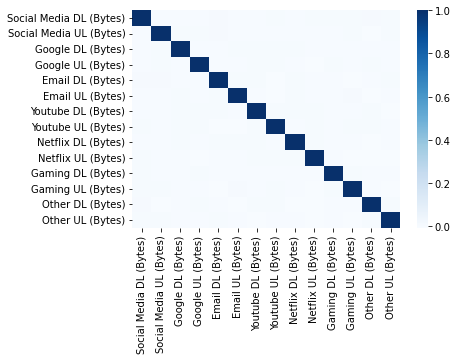

In [24]:
corr = clean_data[['Social Media DL (Bytes)','Social Media UL (Bytes)', 
 'Google DL (Bytes)', 'Google UL (Bytes)',
'Email DL (Bytes)', 'Email UL (Bytes)',
'Youtube DL (Bytes)','Youtube UL (Bytes)', 
'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
'Other DL (Bytes)', 'Other UL (Bytes)']].corr()

# plot the heatmap
sns.heatmap(corr,cmap='Blues',
            xticklabels=corr.columns,
            yticklabels=corr.columns)
